<a id='0.1'></a>
## 0.1 load required packages

# Table of contents


> 0. [Minimum required packages and settings](#0)
>>
>> 0.1: [import required packages](#0.1)
>
> 1. [Extract region sequences](#1)

<a id='0.1'></a>
## 0.1 load required packages

In [1]:
%run "C:\\Users\\shiwei\\Documents\\ImageAnalysis3\\required_files\\Startup_py3.py"
sys.path.append(r"C:\\Users\\shiwei\\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

# library design specific tools
from ImageAnalysis3.library_tools import LibraryDesigner as ld
from ImageAnalysis3.library_tools import LibraryTools as lt
# biopython imports
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Blast.Applications import NcbiblastnCommandline
from Bio.Blast import NCBIXML

creating new log file
2022-01-26 17:04:37,588 [INFO] WRITING LOG OUTPUT TO C:\Users\shiwei\.cellpose\run.log
5408


<a id='1'></a>
# 1 Set folders

Note: First copy releveant files to the new library folder
icluding: common_pb_dict.pkl; blast_full_probes.fasta; chr_2_region_num.pkl

In [2]:
## Some folders
# human genome
reference_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\mouse\GRCm38_ensembl'
genome_folder = os.path.join(reference_folder, 'Genome')
# Library directories
pool_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-13_brain-super-enhancers'

library_folder =r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-13_brain-super-enhancers\mop_SE_20_sequential'


In [7]:
from ImageAnalysis3 import library_tools

# 5. Add sequential probes from subset of regions for control experiment (sequential)

### 5.1 Generate new filtered pb dict for seleted 10 region

#### 5.11 Load all common probes to filter by genome count; subset 10 regions for further step

In [3]:
# load the saved common pb dict
pb_dict_from_load = pickle.load(open(os.path.join(library_folder, 'common_pb_dict.pkl'), 'rb'))


print(len(pb_dict_from_load))
pb_dict_from_load[1].kept_probes

975


{b'CCAATGGCTCTAGCTAATTATTATTTTACCGTGGTATTCTCA': {'name': '1:9600471-9656458_strand_+_reg_1_pb_52',
  'reg_index': 1,
  'reg_name': '1:9600471-9656458_strand_+_reg_1',
  'pb_index': 52,
  'strand': '-',
  'gc': 0.35714285714285715,
  'tm': 73.5139860484968,
  'map_genome': 36,
  'map_transcriptome': 0,
  'map_rep_genome': 0,
  'map_self_sequences': 26},
 b'GCTACACAGTTTCACACCATAAGACTGATGGAGTGTAATGAA': {'name': '1:9600471-9656458_strand_+_reg_1_pb_177',
  'reg_index': 1,
  'reg_name': '1:9600471-9656458_strand_+_reg_1',
  'pb_index': 177,
  'strand': '-',
  'gc': 0.40476190476190477,
  'tm': 74.26324583685204,
  'map_genome': 42,
  'map_transcriptome': 0,
  'map_rep_genome': 0,
  'map_self_sequences': 26},
 b'GTGCACACACCAAGGGACCCGTTTATAGGATAGTTATATTTT': {'name': '1:9600471-9656458_strand_+_reg_1_pb_403',
  'reg_index': 1,
  'reg_name': '1:9600471-9656458_strand_+_reg_1',
  'pb_index': 403,
  'strand': '-',
  'gc': 0.40476190476190477,
  'tm': 76.35069927644616,
  'map_genome': 29,
  'map_

In [8]:
# filter by genome counts to only keep regions that have 400 pbs
reload(library_tools.quality_check)

num_probes_kept = 400 # max num of probes kept for each region
filtered_pb_dict_seq = library_tools.quality_check.Screen_probe_by_hit(library_folder, pb_dict_from_load, num_probes_kept,
                                                                  hit_type='genome')

## filter by minimum number of probes in each region
min_num_probes = 400
removed_regions = []
for _rid, _pb_class in filtered_pb_dict_seq.items():
    if len(_pb_class.kept_probes) < min_num_probes:
        print(f"region: {_rid} removed with {len(_pb_class.kept_probes)} probes")
        removed_regions.append(_rid)
for _rid in removed_regions:
    del(filtered_pb_dict_seq[_rid])

- Screen probes by genome counts.
-- filtering region:251, screen genome to keep 400 probes
-- filtering region:252, screen genome to keep 400 probes
-- filtering region:253, screen genome to keep 400 probes
-- filtering region:255, screen genome to keep 400 probes
-- filtering region:256, screen genome to keep 400 probes
-- filtering region:257, screen genome to keep 400 probes
-- filtering region:258, screen genome to keep 400 probes
-- filtering region:259, screen genome to keep 400 probes
-- filtering region:260, screen genome to keep 400 probes
-- filtering region:261, screen genome to keep 400 probes
-- filtering region:262, screen genome to keep 400 probes
-- filtering region:263, screen genome to keep 400 probes
-- filtering region:264, screen genome to keep 400 probes
-- filtering region:265, screen genome to keep 400 probes
-- filtering region:266, screen genome to keep 400 probes
-- filtering region:267, screen genome to keep 400 probes
-- filtering region:268, screen genome

-- filtering region:448, screen genome to keep 400 probes
-- filtering region:449, screen genome to keep 400 probes
-- filtering region:450, screen genome to keep 400 probes
-- filtering region:451, screen genome to keep 400 probes
-- filtering region:452, screen genome to keep 400 probes
-- filtering region:453, screen genome to keep 400 probes
-- filtering region:454, screen genome to keep 400 probes
-- filtering region:455, screen genome to keep 400 probes
-- filtering region:456, screen genome to keep 400 probes
-- filtering region:457, screen genome to keep 400 probes
-- filtering region:458, screen genome to keep 400 probes
-- filtering region:459, screen genome to keep 400 probes
-- filtering region:460, screen genome to keep 400 probes
-- filtering region:461, screen genome to keep 400 probes
-- filtering region:462, screen genome to keep 400 probes
-- filtering region:463, screen genome to keep 400 probes
-- filtering region:464, screen genome to keep 400 probes
-- filtering r

-- filtering region:634, screen genome to keep 400 probes
-- filtering region:635, screen genome to keep 400 probes
-- filtering region:636, screen genome to keep 400 probes
-- filtering region:637, screen genome to keep 400 probes
-- filtering region:638, screen genome to keep 400 probes
-- filtering region:639, screen genome to keep 400 probes
-- filtering region:640, screen genome to keep 400 probes
-- filtering region:641, screen genome to keep 400 probes
-- filtering region:642, screen genome to keep 400 probes
-- filtering region:643, screen genome to keep 400 probes
-- filtering region:644, screen genome to keep 400 probes
-- filtering region:645, screen genome to keep 400 probes
-- filtering region:646, screen genome to keep 400 probes
-- filtering region:647, screen genome to keep 400 probes
-- filtering region:648, screen genome to keep 400 probes
-- filtering region:649, screen genome to keep 400 probes
-- filtering region:650, screen genome to keep 400 probes
-- filtering r

-- filtering region:65, screen genome to keep 400 probes
-- filtering region:66, screen genome to keep 400 probes
-- filtering region:67, screen genome to keep 400 probes
-- filtering region:68, screen genome to keep 400 probes
-- filtering region:69, screen genome to keep 400 probes
-- filtering region:70, screen genome to keep 400 probes
-- filtering region:71, screen genome to keep 400 probes
-- filtering region:72, screen genome to keep 400 probes
-- filtering region:73, screen genome to keep 400 probes
-- filtering region:74, screen genome to keep 400 probes
-- filtering region:75, screen genome to keep 400 probes
-- filtering region:76, screen genome to keep 400 probes
-- filtering region:77, screen genome to keep 400 probes
-- filtering region:78, screen genome to keep 400 probes
-- filtering region:79, screen genome to keep 400 probes
-- filtering region:80, screen genome to keep 400 probes
-- filtering region:81, screen genome to keep 400 probes
-- filtering region:82, screen 

-- filtering region:215, screen genome to keep 400 probes
-- filtering region:216, screen genome to keep 400 probes
-- filtering region:217, screen genome to keep 400 probes
-- filtering region:218, screen genome to keep 400 probes
-- filtering region:219, screen genome to keep 400 probes
-- filtering region:220, screen genome to keep 400 probes
-- filtering region:221, screen genome to keep 400 probes
-- filtering region:222, screen genome to keep 400 probes
-- filtering region:223, screen genome to keep 400 probes
-- filtering region:224, screen genome to keep 400 probes
-- filtering region:225, screen genome to keep 400 probes
-- filtering region:226, screen genome to keep 400 probes
-- filtering region:227, directly append 6 probes
-- filtering region:228, screen genome to keep 400 probes
-- filtering region:229, screen genome to keep 400 probes
-- filtering region:230, screen genome to keep 400 probes
-- filtering region:231, screen genome to keep 400 probes
-- filtering region:23

-- filtering region:862, screen genome to keep 400 probes
-- filtering region:863, screen genome to keep 400 probes
-- filtering region:864, screen genome to keep 400 probes
-- filtering region:866, screen genome to keep 400 probes
-- filtering region:867, screen genome to keep 400 probes
-- filtering region:868, screen genome to keep 400 probes
-- filtering region:869, screen genome to keep 400 probes
-- filtering region:870, screen genome to keep 400 probes
-- filtering region:871, screen genome to keep 400 probes
-- filtering region:872, screen genome to keep 400 probes
-- filtering region:873, screen genome to keep 400 probes
-- filtering region:874, screen genome to keep 400 probes
-- filtering region:875, screen genome to keep 400 probes
-- filtering region:876, screen genome to keep 400 probes
-- filtering region:877, screen genome to keep 400 probes
-- filtering region:878, screen genome to keep 400 probes
-- filtering region:879, screen genome to keep 400 probes
-- filtering r

<IPython.core.display.Javascript object>


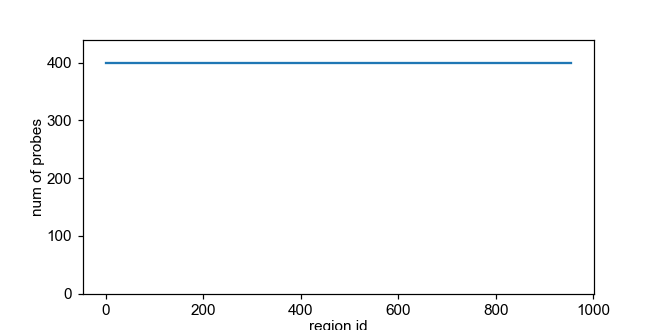

In [9]:
# plot the probe number against all regins
pb_num_dict = {_k:len(_v.kept_probes) for _k,_v in filtered_pb_dict_seq.items()}

pb_nums = np.array(list(pb_num_dict.values()))
plt.figure(figsize=(6,3), dpi=100)
plt.plot(pb_nums)
#plt.plot(np.ones(len(pb_nums))*20)
plt.ylabel(f"num of probes", labelpad=1)
plt.xlabel(f"region id", labelpad=1)
plt.ylim([0, num_probes_kept*1.1])
plt.show()

In [10]:
# load num per chr to select 
chr_2_region_num = pickle.load(open(os.path.join(library_folder, 'chr_2_region_num.pkl'), 'rb'))

chr_2_region_num

{'4': 61,
 '5': 56,
 '6': 56,
 '7': 45,
 '8': 52,
 '9': 54,
 '10': 64,
 '11': 57,
 '12': 35,
 '13': 49,
 '1': 76,
 '2': 73,
 '3': 59,
 '14': 51,
 '15': 35,
 '16': 37,
 '17': 34,
 '18': 32,
 '19': 35,
 'X': 7}

In [11]:
# Select 2 regions each from the first 5 chromosome to be used as controls
sel_regions = []
cum_reg_end = 0
for _chr in range(5):
    reg_end = chr_2_region_num[str(_chr+1)]
    cum_reg_end+=reg_end
    sel_regions.append(cum_reg_end-40)
    sel_regions.append(cum_reg_end-20)
    
for _reg in sel_regions:
    if _reg not in list(filtered_pb_dict_seq.keys()):
        print('Region not found.')

# remove one to keep 9 regions
sel_regions = sel_regions[:9]

sel_regions

[36, 56, 109, 129, 168, 188, 229, 249, 285]

In [12]:
# Generate subset filtered_pb_dict_seq_sel
filtered_pb_dict_seq_sel = {}
for _reg in sel_regions:
    filtered_pb_dict_seq_sel[_reg] = filtered_pb_dict_seq[_reg]

filtered_pb_dict_seq_sel

{36: <ImageAnalysis3.library_tools.LibraryDesigner.pb_reports_class at 0x2284c9c27f0>,
 56: <ImageAnalysis3.library_tools.LibraryDesigner.pb_reports_class at 0x2284c9b71c0>,
 109: <ImageAnalysis3.library_tools.LibraryDesigner.pb_reports_class at 0x2284c9b7cd0>,
 129: <ImageAnalysis3.library_tools.LibraryDesigner.pb_reports_class at 0x2284c9b7a30>,
 168: <ImageAnalysis3.library_tools.LibraryDesigner.pb_reports_class at 0x2284c9a3580>,
 188: <ImageAnalysis3.library_tools.LibraryDesigner.pb_reports_class at 0x2284c9a3c10>,
 229: <ImageAnalysis3.library_tools.LibraryDesigner.pb_reports_class at 0x2284da1b940>,
 249: <ImageAnalysis3.library_tools.LibraryDesigner.pb_reports_class at 0x2284da4a310>,
 285: <ImageAnalysis3.library_tools.LibraryDesigner.pb_reports_class at 0x2284dd51610>}

#### 5.13 Assemble probes 

In [13]:
# Use same primer set
from ImageAnalysis3 import library_tools
primer_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Primers'
primers = library_tools.assemble.load_primers([2,9], _primer_folder=primer_folder)

- Picked primer: ID: W1A03_primer_2
Name: W1A03_primer_2
Description: W1A03_primer_2
Number of features: 0
Seq('CCCGCAATGGCTGACAACCG')
- Picked primer: ID: W1A10_primer_9
Name: W1A10_primer_9
Description: W1A10_primer_9
Number of features: 0
Seq('TAATACGACTCACTATAGGGATTGCCGCATGGTTTCCG')


In [14]:
# Use different readout 
# Make region_2_readout_dict for sequential lib

region_2_readout_dict_seq = {}
# start from u0
for _i, _reg in enumerate(filtered_pb_dict_seq_sel.keys()):
    region_2_readout_dict_seq[_reg] = []
    region_2_readout_dict_seq[_reg].append(f'u{_i*2}')
    region_2_readout_dict_seq[_reg].append(f'u{_i*2+1}')

    

# save
pickle.dump(region_2_readout_dict_seq, open(os.path.join(library_folder,'region_2_readout_dict_seq.pkl'), 'wb'))
region_2_readout_dict_seq    

# collect types
# one type for this library which is 'u'

readout_usage_by_type = {}
for _region, _infos in region_2_readout_dict_seq.items():
    # for each bit 
    for _info in _infos:
        if _info[0] not in readout_usage_by_type:
            readout_usage_by_type[_info[0]] = []
        if int(_info[1:]) not in readout_usage_by_type[_info[0]]:
            readout_usage_by_type[_info[0]].append(int(_info[1:]))
            
readout_usage_by_type
readout_usage_dict = {_type:len(_v) for _type,_v in readout_usage_by_type.items()}
readout_dict ={}

In [15]:
region_2_readout_dict_seq

{36: ['u0', 'u1'],
 56: ['u2', 'u3'],
 109: ['u4', 'u5'],
 129: ['u6', 'u7'],
 168: ['u8', 'u9'],
 188: ['u10', 'u11'],
 229: ['u12', 'u13'],
 249: ['u14', 'u15'],
 285: ['u16', 'u17']}

In [16]:
reload(library_tools.assemble)
overwrite_readout_usage = True
readout_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Readouts'
readout_start = int(1 + 95/2)
num_color = 2

# generate the 'snr_before_630_750.fasta' and 'snr_before_630_647.fasta' (see above) first before proceeding

seq_readouts = library_tools.assemble.load_readouts(readout_usage_dict['u'], 
                                                       _type='snr_before_630', 
                                                       _readout_folder=readout_folder, 
                                                       _num_colors=2, # 750, 647
                                                       _start_id=readout_start,
                                                       )
readout_dict['u'] = seq_readouts

In [17]:
readout_dict

{'u': [SeqRecord(seq=Seq('GTAGATAACACACGCCTCGGTGCTGGATTA'), id='NDB_496', name='NDB_496', description='NDB_496', dbxrefs=[]),
  SeqRecord(seq=Seq('AGATACGATCATGTTAGTCGCCGTCGGCAT'), id='NDB_329', name='NDB_329', description='NDB_329', dbxrefs=[]),
  SeqRecord(seq=Seq('TCTCACTAGGTGTTACGTGACCGCGGGAAT'), id='NDB_553', name='NDB_553', description='NDB_553', dbxrefs=[]),
  SeqRecord(seq=Seq('TACGTGGGCTCGATTCGGTACTTAGCCTGG'), id='NDB_488', name='NDB_488', description='NDB_488', dbxrefs=[]),
  SeqRecord(seq=Seq('TCGCTGTGAGCTAACGCGCTTTGAAGCACT'), id='NDB_586', name='NDB_586', description='NDB_586', dbxrefs=[]),
  SeqRecord(seq=Seq('GGTAAACTAGTTGTCACCCGTCGTGTTCCG'), id='NDB_416', name='NDB_416', description='NDB_416', dbxrefs=[]),
  SeqRecord(seq=Seq('CTAAAGTTGCGATCTAGGGTCCCTAACTAA'), id='NDB_595', name='NDB_595', description='NDB_595', dbxrefs=[]),
  SeqRecord(seq=Seq('ATCGATGGAGTTCGTCTTACCGCGAGTCTT'), id='NDB_503', name='NDB_503', description='NDB_503', dbxrefs=[]),
  SeqRecord(seq=Seq('TGGATG

In [18]:
# save
readout_usage_file = os.path.join(library_folder, 'readout_usage_seq.pkl')
if not os.path.isfile(readout_usage_file) or overwrite_readout_usage:
    print('save')
    pickle.dump(readout_dict, open(readout_usage_file, 'wb'))

save


In [23]:
# assemble full-length probes using primer, readouts, and targeting regions (from filtered_pb_dict)

reload(library_tools.assemble)
from ImageAnalysis3.library_tools.assemble import Assemble_probes

cand_probes, readout_summary = Assemble_probes(library_folder, filtered_pb_dict_seq_sel, 
                                               region_2_readout_dict_seq, readout_dict, primers, 
                                               primer_len=20, 
                                               num_readout_per_probe=3, 
                                               unique_readout_per_probe=True,
                                               rc_targets=False, overwrite=True)

- Assemble probes by given target sequences, readouts and primers.
-- included readout types: ['u']
--- assemblying 400 probes in region: 36
--- assemblying 400 probes in region: 56
--- assemblying 400 probes in region: 109
--- assemblying 400 probes in region: 129
--- assemblying 400 probes in region: 168
--- assemblying 400 probes in region: 188
--- assemblying 400 probes in region: 229
--- assemblying 400 probes in region: 249
--- assemblying 400 probes in region: 285
-- 3600 probes assembled in total.
-- saving 3600 probes into file:\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-13_brain-super-enhancers\mop_SE_20_sequential\candidate_probes.fasta
-- saving readout_summary into file:\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-13_brain-super-enhancers\mop_SE_20_sequential\readout_summary.pkl


#### 5.14 Check probes 

In [24]:
# folder for this library
# candidate full-length probe filename
candidate_basename = 'candidate_probes.fasta' # old version



# load assembled full-length probes from the "candidate_probes.fasta" file
full_records = []


with open(os.path.join(library_folder, candidate_basename), 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        full_records.append(record)

print(f"Total probe loaded: {len(full_records)}")

Total probe loaded: 3600


In [26]:
num_readout_per_probe = 3
primer_len=20
target_len=42
min_num_probes = 40

In [27]:
# check

import ImageAnalysis3.library_tools.quality_check as check
reload(check)
primer_check = check._check_primer_usage(full_records, primers[0], primers[1], primer_len=primer_len)
print(primer_check)

-- Checking primer usage, total probes: 3600
True


In [28]:
# get num of pbs for each region for the full records before the check steps below

reload(check)
reg_size_dic, len_check = check._check_region_size(full_records, 
                                                   min_size=min_num_probes)
print(len_check)

gene: 36 -> 400
gene: 56 -> 400
gene: 109 -> 400
gene: 129 -> 400
gene: 168 -> 400
gene: 188 -> 400
gene: 229 -> 400
gene: 249 -> 400
gene: 285 -> 400
True


In [31]:
# construct internal map
reload(check)
#int_map = check._construct_internal_map(full_records, library_folder, save=True) # file is big; not necessary to save

int_map = check._construct_internal_map(full_records, library_folder, save=False) 

In [32]:
# check between probes
kept_records, removed_count = check._check_between_probes(full_records, int_map, 
                                                          primer_len=primer_len, 
                                                          target_len=target_len)

--- Sequence:loc_4:40762947-40854743_gene_229_pb_330_pos_87082_strand_-_readouts_[NDB_475_u,NDB_475_u,NDB_475_u]_primers_[W1A03_primer_2,W1A10_primer_9] got hits:80, dumped
--- Sequence:loc_4:40762947-40854743_gene_229_pb_331_pos_87157_strand_-_readouts_[NDB_407_u,NDB_407_u,NDB_407_u]_primers_[W1A03_primer_2,W1A10_primer_9] got hits:55, dumped
--- Sequence:loc_4:40762947-40854743_gene_229_pb_332_pos_87244_strand_-_readouts_[NDB_475_u,NDB_475_u,NDB_475_u]_primers_[W1A03_primer_2,W1A10_primer_9] got hits:64, dumped
--- Sequence:loc_4:40762947-40854743_gene_229_pb_334_pos_87423_strand_-_readouts_[NDB_475_u,NDB_475_u,NDB_475_u]_primers_[W1A03_primer_2,W1A10_primer_9] got hits:72, dumped
-- total probes removed by internal screening: 4


In [33]:
# save kept records as filtered probes after internal check
with open(os.path.join(library_folder, 'filtered_full_probes.fasta'), 'w') as output_handle:
    SeqIO.write(kept_records, output_handle, "fasta")

### 5.2 Subtract the used probes from combinatory lib

In [34]:
# get all final used probes 
# load final probes

library_folder =r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-13_brain-super-enhancers\mop_SE_20_sequential'
final_pb_filename = os.path.join(library_folder, 'blast_full_probes_from_comb.fasta')
# SeqIO
final_pb_records = []
with open(final_pb_filename, 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        final_pb_records.append(record)

print(len(final_pb_records))

115776


In [54]:
#get unused probes by subtracting the final_pb_records from the # load all the 
from tqdm import tqdm

unused_pb_records = []
# final pb sequence for the sel regions above
final_pb_records_sel = [_pb for _pb in final_pb_records if int(_pb.id.split('gene_')[1].split('_pb')[0]) in sel_regions]

final_pb_records_sel_tar = [_pb.seq[40:82] for _pb in final_pb_records_sel]

for _pb in tqdm(kept_records):
    
    if _pb.seq[40:82] not in final_pb_records_sel_tar:
        unused_pb_records.append(_pb)
        
print (f'-- The number of used probe for each region equal {(len(kept_records) -len(unused_pb_records))/9}.')  # use pb for each should be 120 if no issue


# save kept records as filtered probes after removing used 
with open(os.path.join(library_folder, 'filtered_full_probes.fasta'), 'w') as output_handle:
    SeqIO.write(unused_pb_records, output_handle, "fasta")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3596/3596 [00:01<00:00, 1854.56it/s]


-- The number of used probe for each region equal 120.0.


### 5.3 Check against the ctp13-comb internal map

In [56]:
# load probes for ctp-13

ctp13_filename = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-13_brain-super-enhancers\mop_SE_20_sequential\blast_full_probes_from_comb.fasta'

# convert probes into SeqIO list as full_records_ctp11
full_records_ctp13 = []

with open(ctp13_filename, 'r') as _handle:
    for _record in SeqIO.parse(_handle, "fasta"):
        full_records_ctp13.append(_record)
        
print(len(full_records_ctp13))

115776


In [57]:
# construct internal map using loaded ctp-11 (as full_records_ctp11)
reload(check)
#int_map = check._construct_internal_map(full_records, library_folder, save=True) # file is big; not necessary to save

int_map_ctp13 = check._construct_internal_map(full_records_ctp13, library_folder, save=False) 

In [61]:
# check filtered probes (kept_records, excluding primer regions by primer_len) against probes from ctp11 (int_map_ctp11)

# try use stringent hit th to avoid overlapping/similar targeting regions between libraries
# try _max_internal_hits=1 for 17-mer
# both strands considered by default using the function

unused_pb_records_new, removed_count_ctp13 = check._check_between_probes(unused_pb_records, int_map_ctp13, 
                                                          primer_len=primer_len, 
                                                          target_len=target_len,
                                                                     _max_internal_hits=1)

print(len(unused_pb_records_new))

--- Sequence:loc_1:79813369-79876804_gene_36_pb_186_pos_46971_strand_+_readouts_[NDB_496_u,NDB_496_u,NDB_496_u]_primers_[W1A03_primer_2,W1A10_primer_9] got hits:2, dumped
--- Sequence:loc_2:84845394-84900174_gene_109_pb_222_pos_39323_strand_-_readouts_[NDB_586_u,NDB_586_u,NDB_586_u]_primers_[W1A03_primer_2,W1A10_primer_9] got hits:2, dumped
--- Sequence:loc_2:84845394-84900174_gene_109_pb_227_pos_39667_strand_+_readouts_[NDB_416_u,NDB_416_u,NDB_416_u]_primers_[W1A03_primer_2,W1A10_primer_9] got hits:2, dumped
--- Sequence:loc_2:132260572-132326514_gene_129_pb_172_pos_44876_strand_+_readouts_[NDB_595_u,NDB_595_u,NDB_595_u]_primers_[W1A03_primer_2,W1A10_primer_9] got hits:2, dumped
--- Sequence:loc_2:132260572-132326514_gene_129_pb_241_pos_49497_strand_+_readouts_[NDB_503_u,NDB_503_u,NDB_503_u]_primers_[W1A03_primer_2,W1A10_primer_9] got hits:2, dumped
--- Sequence:loc_3:50892858-50950176_gene_168_pb_22_pos_9462_strand_-_readouts_[NDB_484_u,NDB_484_u,NDB_484_u]_primers_[W1A03_primer_2,W1

### 5.4 Check against the ctp11-comb internal map

In [62]:
# load probes for ctp-11

ctp11_filename = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-11_brain\mouse_genome_1000\blast_full_probes.fasta'

# convert probes into SeqIO list as full_records_ctp11
full_records_ctp11 = []

with open(ctp11_filename, 'r') as _handle:
    for _record in SeqIO.parse(_handle, "fasta"):
        full_records_ctp11.append(_record)
        
print(len(full_records_ctp11))

114719


In [63]:
# construct internal map using loaded ctp-11 (as full_records_ctp11)
reload(check)
#int_map = check._construct_internal_map(full_records, library_folder, save=True) # file is big; not necessary to save

int_map_ctp11 = check._construct_internal_map(full_records_ctp11, library_folder, save=False) 

In [64]:
# check filtered probes (kept_records, excluding primer regions by primer_len) against probes from ctp11 (int_map_ctp11)

# try use stringent hit th to avoid overlapping/similar targeting regions between libraries
# try _max_internal_hits=1 for 17-mer
# both strands considered by default using the function

unused_pb_records_new_new, removed_count_ctp11 = check._check_between_probes(unused_pb_records_new, int_map_ctp11, 
                                                          primer_len=primer_len, 
                                                          target_len=target_len,
                                                                     _max_internal_hits=1)

print(len(unused_pb_records_new_new))

--- Sequence:loc_1:79813369-79876804_gene_36_pb_13_pos_34877_strand_+_readouts_[NDB_329_u,NDB_329_u,NDB_329_u]_primers_[W1A03_primer_2,W1A10_primer_9] got hits:2, dumped
--- Sequence:loc_1:79813369-79876804_gene_36_pb_57_pos_37953_strand_+_readouts_[NDB_329_u,NDB_329_u,NDB_329_u]_primers_[W1A03_primer_2,W1A10_primer_9] got hits:2, dumped
--- Sequence:loc_1:152397309-152486632_gene_56_pb_172_pos_54869_strand_-_readouts_[NDB_553_u,NDB_553_u,NDB_553_u]_primers_[W1A03_primer_2,W1A10_primer_9] got hits:3, dumped
--- Sequence:loc_1:152397309-152486632_gene_56_pb_269_pos_62995_strand_+_readouts_[NDB_488_u,NDB_488_u,NDB_488_u]_primers_[W1A03_primer_2,W1A10_primer_9] got hits:2, dumped
--- Sequence:loc_1:152397309-152486632_gene_56_pb_284_pos_72645_strand_+_readouts_[NDB_553_u,NDB_553_u,NDB_553_u]_primers_[W1A03_primer_2,W1A10_primer_9] got hits:2, dumped
--- Sequence:loc_2:132260572-132326514_gene_129_pb_234_pos_49066_strand_+_readouts_[NDB_595_u,NDB_595_u,NDB_595_u]_primers_[W1A03_primer_2,W1

In [65]:
reload(check)

# get num of pbs for each region after check against ctp11 library
reg_size_dic_temp, len_check_temp = check._check_region_size(unused_pb_records_new_new, 
                                                   min_size=min_num_probes)

gene: 36 -> 277
gene: 56 -> 277
gene: 109 -> 278
gene: 129 -> 277
gene: 168 -> 279
gene: 188 -> 279
gene: 229 -> 275
gene: 249 -> 279
gene: 285 -> 277


In [67]:
# save kept records after check against ctp11  #use default filename or specify the filename when using blastn screen probes
with open(os.path.join(library_folder, 'filtered_full_probes.fasta'), 'w') as output_handle:
    SeqIO.write(unused_pb_records_new_new, output_handle, "fasta")

### 5.5 BLAST screening of probes

In [68]:
# if blastn is installed and can be found by jupyter, the below command will show the help page for blastn
!blastn -h

USAGE
  blastn [-h] [-help] [-import_search_strategy filename]
    [-export_search_strategy filename] [-task task_name] [-db database_name]
    [-dbsize num_letters] [-gilist filename] [-seqidlist filename]
    [-negative_gilist filename] [-negative_seqidlist filename]
    [-taxids taxids] [-negative_taxids taxids] [-taxidlist filename]
    [-negative_taxidlist filename] [-entrez_query entrez_query]
    [-db_soft_mask filtering_algorithm] [-db_hard_mask filtering_algorithm]
    [-subject subject_input_file] [-subject_loc range] [-query input_file]
    [-out output_file] [-evalue evalue] [-word_size int_value]
    [-gapopen open_penalty] [-gapextend extend_penalty]
    [-perc_identity float_value] [-qcov_hsp_perc float_value]
    [-max_hsps int_value] [-xdrop_ungap float_value] [-xdrop_gap float_value]
    [-xdrop_gap_final float_value] [-searchsp int_value]
    [-sum_stats bool_value] [-penalty penalty] [-reward reward] [-no_greedy]
    [-min_raw_gapped_score int_value] [-template_type

In [69]:
import ImageAnalysis3.library_tools.quality_check as check
reload(check)

blast_database = os.path.join(reference_folder, 'blast_database', 'GRCm38_ensembl')

# run blast using the pre-generated blastn database (on NAS2)
# use kept_records_ctp11 after check against ctp11 library

# output as blast files saved in the library folder; 
# make sure to delete any old blast files if re-run this step (with different input)

check.Blast_probes(unused_pb_records_new_new, library_folder, num_threads=32, 
                   blast_db=blast_database, blast_evalue=100, overwrite=True)

- Blast probe against \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\mouse\GRCm38_ensembl\blast_database\GRCm38_ensembl
-- number of probes loaded: 2498
-- processing region: 109 with 278 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-13_brain-super-enhancers\mop_SE_20_sequential\blast\probe_gene_109.fasta
--- *blasting region: 109
--- total time for blast 109: 13.299001932144165
-- processing region: 129 with 277 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-13_brain-super-enhancers\mop_SE_20_sequential\blast\probe_gene_129.fasta
--- *blasting region: 129
--- total time for blast 129: 10.940000772476196
-- processing region: 168 with 279 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-13_brain-super-enhancers\mop_SE_20_sequential\blast\probe_gene_168.fasta
--- *blasting region: 168
--- total time for blast 168: 9.980000734329224
-- processing region: 188 with 279 probe

In [70]:
# screen
import ImageAnalysis3.library_tools.quality_check as check
reload(check)

# the max number to keep for each region
num_probes_per_region = 120


# read the blast files saved from above to screen probes;
# the screen step also keeps probes close to the center of each region;
kept_pbs, blast_keep_dic, hard_count_list, soft_count_list = check.Screening_Probes_by_Blast(library_folder, 
                                                                                             num_probes_per_region,
                                                                                             hard_thres=target_len,
                                                                                             soft_count_th=50,
                                                                                             keep_mode='front',
                                                                                             save_filename='blast_full_probes_seq.fasta',
                                                                                             )

# 'blast_full_probes_seq.fasta' saved automatically from the function above

- Number of probes loaded: 2498
- Number of regions in this library: 9
-- checking probes in region: 36
--- gene=36, id=89 removed by soft count = 51
--- gene=36, id=200 removed by soft count = 53
--- number of probes: 277 , kept by blast: 275 , if remove dups: 275
--- remove duplicated probes
-- number of probes kept for this region: 120
-- checking probes in region: 56
--- gene=56, id=123 removed by soft count = 77
--- gene=56, id=206 removed by soft count = 138
--- gene=56, id=235 removed by soft count = 76
--- number of probes: 277 , kept by blast: 274 , if remove dups: 273
--- remove duplicated probes
-- number of probes kept for this region: 120
-- checking probes in region: 109
--- gene=109, id=1 removed by soft count = 87
--- gene=109, id=261 removed by soft count = 76
--- number of probes: 278 , kept by blast: 276 , if remove dups: 276
--- remove duplicated probes
-- number of probes kept for this region: 120
-- checking probes in region: 129
--- gene=129, id=185 removed by so

### 5.6 Reload to check

In [71]:
# load final probes
final_pb_filename = os.path.join(library_folder, 'blast_full_probes_seq.fasta')

# SeqIO
final_pb_records = []
with open(final_pb_filename, 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        final_pb_records.append(record)

In [72]:
reload(check)

# get final num of pbs for each region after blastn
reg_size_dic_final, len_check_final = check._check_region_size(final_pb_records, 
                                                   min_size=min_num_probes)

gene: 36 -> 120
gene: 56 -> 120
gene: 109 -> 120
gene: 129 -> 120
gene: 168 -> 120
gene: 188 -> 120
gene: 229 -> 120
gene: 249 -> 120
gene: 285 -> 120


<IPython.core.display.Javascript object>


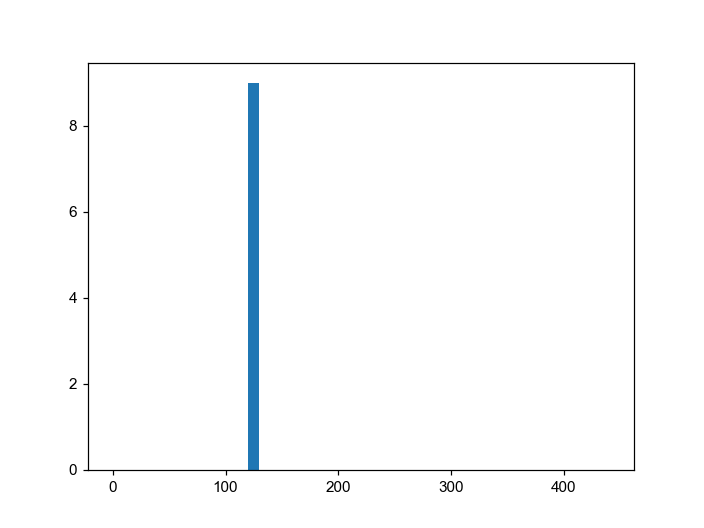

there are 9 regions with more than 100 probes before blastn.


In [73]:
plt.figure()
plt.hist(list(reg_size_dic_final.values()), bins=np.arange(0,450,10))
plt.show()


pb_num_goal = 100

print(f'there are {np.sum(np.array(list(reg_size_dic_final.values()))>pb_num_goal)} regions with more than {pb_num_goal} probes before blastn.')